In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from datetime import datetime
import os
import sklearn.model_selection
from sklearn import*
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import FunctionTransformer

In [6]:
df1 = pd.read_csv("E:\MDA 2023\Full noise data\Jan\csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df1 = df1[['result_timestamp','laeq']]
df2 = pd.read_csv("E:\MDA 2023\Full noise data\Feb\csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df2 = df2[['result_timestamp','laeq']]
df3 = pd.read_csv("E:\MDA 2023\Full noise data\March\csv_results_44_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df3 = df3[['result_timestamp','laeq']]
df4 = pd.read_csv("E:\MDA 2023\Full noise data\April\csv_results_45_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df4 = df4[['result_timestamp','laeq']]
df5 = pd.read_csv("E:\MDA 2023\Full noise data\May\csv_results_46_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df5 = df5[['result_timestamp','laeq']]
df6 = pd.read_csv("E:\MDA 2023\Full noise data\June\csv_results_47_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df6 = df6[['result_timestamp','laeq']]
df7 = pd.read_csv("E:\MDA 2023\Full noise data\Jul\csv_results_48_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df7 = df7[['result_timestamp','laeq']]
df8 = pd.read_csv("E:\MDA 2023\Full noise data\Aug\csv_results_49_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df8 = df8[['result_timestamp','laeq']]
df9 = pd.read_csv("E:\MDA 2023\Full noise data\Sep\csv_results_50_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df9 = df9[['result_timestamp','laeq']]
df10 = pd.read_csv("E:\MDA 2023\Full noise data\Oct\csv_results_51_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df10 = df10[['result_timestamp','laeq']]
df11 = pd.read_csv("E:\MDA 2023\Full noise data\\Nov\csv_results_52_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df11 = df11[['result_timestamp','laeq']]
df12 = pd.read_csv("E:\MDA 2023\Full noise data\Dec\csv_results_53_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df12 = df12[['result_timestamp','laeq']]
dfn = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0)

In [7]:
# Convert noise datetime column to a Pandas datetime object
dfn['result_timestamp'] = pd.to_datetime(dfn['result_timestamp'], format="%d/%m/%Y %H:%M:%S.%f")
df_backup = dfn

In [8]:
#dfn = df_backup

In [9]:
# set timestamp column as the index
dfn.set_index('result_timestamp', inplace=True)

In [10]:
# resample to one minute frequency and aggregate using the mean
dfn = dfn.resample('10T').mean()

In [11]:
# Drop the datetime column from the index and reset the index to default
dfn = dfn.reset_index()
dfn

,result_timestamp,laeq
0,2022-01-01 00:00:00,54.790667
1,2022-01-01 00:10:00,48.605833
2,2022-01-01 00:20:00,54.277833
3,2022-01-01 00:30:00,50.025333
4,2022-01-01 00:40:00,48.907333
...,...,...
52555,2022-12-31 23:10:00,52.203333
52556,2022-12-31 23:20:00,54.622833
52557,2022-12-31 23:30:00,56.135667
52558,2022-12-31 23:40:00,59.380333


In [12]:
# Extract minute-in-the-hour feature (makes model slightly less accurate)
#dfn['minute'] = dfn['result_timestamp'].dt.minute.astype('int64')

# Extract hour-in-the-day feature
dfn['hour'] = dfn['result_timestamp'].dt.hour.astype('int64')

# Extract day-in-the-week feature
dfn['day'] = dfn['result_timestamp'].dt.dayofweek.astype('int64')

# Extract day-in-the-month feature
dfn['day_of_month'] = dfn['result_timestamp'].dt.day.astype('int64')

# Extract month-in-the-year feature
dfn['month'] = dfn['result_timestamp'].dt.month.astype('int64')

In [13]:
def weekend_column(df):
    is_weekend=lambda x: 1 if x==5 or x==6 else 0
    df["weekend"]=df["day"].apply(is_weekend)
    return(df)
dfn=weekend_column(dfn)

In [14]:
#create numeric columns to merge on
dfn['result_timestamp'] = dfn['result_timestamp'].astype('int64')
dfn

,result_timestamp,laeq,hour,day,day_of_month,month,weekend
0,1640995200000000000,54.790667,0,5,1,1,1
1,1640995800000000000,48.605833,0,5,1,1,1
2,1640996400000000000,54.277833,0,5,1,1,1
3,1640997000000000000,50.025333,0,5,1,1,1
4,1640997600000000000,48.907333,0,5,1,1,1
...,...,...,...,...,...,...,...
52555,1672528200000000000,52.203333,23,5,31,12,1
52556,1672528800000000000,54.622833,23,5,31,12,1
52557,1672529400000000000,56.135667,23,5,31,12,1
52558,1672530000000000000,59.380333,23,5,31,12,1


In [43]:
dfn['result_timestamp'] = pd.to_datetime(dfn['result_timestamp'])
dfn.to_csv('dfn.csv')
dfn['result_timestamp'] = dfn['result_timestamp'].astype('int64')


In [44]:
#get weather data
dfw1 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q1.csv")
dfw1 = dfw1[dfw1['ID'] == 'LC-105']
dfw2 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q2.csv")
dfw2 = dfw2[dfw2['ID'] == 'LC-105']
dfw3 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q3.csv")
dfw3 = dfw3[dfw3['ID'] == 'LC-105']
dfw4 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q4.csv")
dfw4 = dfw4[dfw4['ID'] == 'LC-105']
dfw = pd.concat([dfw1,dfw2,dfw3,dfw4],axis=0)
dfw = dfw[['DATEUTC', 'LC_HUMIDITY', 'LC_DWPTEMP', 'LC_n', 'LC_RAD', 'LC_RAININ', 'LC_DAILYRAIN','LC_WINDDIR',
          'LC_WINDSPEED', 'LC_RAD60', 'LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3']]

dfw['result_timestamp'] = dfw['DATEUTC']
dfw = dfw.drop(['DATEUTC'], axis=1)
dfw['result_timestamp'] = pd.to_datetime(dfw['result_timestamp'],format="%Y-%m-%d %H:%M:%S")
dfw['result_timestamp'] = dfw['result_timestamp'].astype('int64')
dfw = dfw[dfw.isnull()['LC_HUMIDITY']==False]
dfw = dfw[dfw['result_timestamp'].duplicated()==False]
dfw.duplicated().sum()

0

In [45]:
#merge noise and weather data
df = pd.merge(dfn,dfw,on='result_timestamp', validate="1:1")

In [17]:
df['result_timestamp'] = pd.to_datetime(df['result_timestamp'])
df

,result_timestamp,laeq,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,2022-01-01 00:10:00,48.605833,0,5,1,1,1,91.0,11.88,38.0,0.0,0.0,0.0,-48.0,0.04,0.0,13.28,13.28,13.223,13.23639
1,2022-01-01 00:20:00,54.277833,0,5,1,1,1,90.0,11.72,37.0,0.0,0.0,0.0,45.0,0.02,0.0,13.28,13.28,13.223,13.16699
2,2022-01-01 00:30:00,50.025333,0,5,1,1,1,90.0,11.72,38.0,0.0,0.0,0.0,-52.0,0.04,0.0,13.28,13.28,13.223,13.19886
3,2022-01-01 00:40:00,48.907333,0,5,1,1,1,90.0,11.72,37.0,0.0,0.0,0.0,34.0,0.02,0.0,13.28,13.28,13.223,13.16699
4,2022-01-01 00:50:00,47.905000,0,5,1,1,1,90.0,11.72,38.0,0.0,0.0,0.0,0.0,0.00,0.0,13.28,13.28,13.223,13.09212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52548,2022-12-31 23:10:00,52.203333,23,5,31,12,1,52.0,6.79,38.0,0.0,0.0,0.0,-9.0,0.40,0.0,16.61,16.61,16.553,16.52797
52549,2022-12-31 23:20:00,54.622833,23,5,31,12,1,52.0,6.74,38.0,0.0,0.0,0.0,5.0,0.29,0.0,16.61,16.61,16.553,16.57995
52550,2022-12-31 23:30:00,56.135667,23,5,31,12,1,52.0,6.62,37.0,0.0,0.0,0.0,-17.0,0.15,0.0,16.51,16.51,16.453,16.44846
52551,2022-12-31 23:40:00,59.380333,23,5,31,12,1,52.0,6.60,38.0,0.0,0.0,0.0,-31.0,0.29,0.0,16.49,16.49,16.433,16.46641


In [18]:
# check for missings
df.isnull().sum()

result_timestamp     0
laeq                84
hour                 0
day                  0
day_of_month         0
month                0
weekend              0
LC_HUMIDITY          0
LC_DWPTEMP           0
LC_n                 0
LC_RAD               0
LC_RAININ            0
LC_DAILYRAIN         0
LC_WINDDIR           0
LC_WINDSPEED         0
LC_RAD60             0
LC_TEMP_QCL0         0
LC_TEMP_QCL1        54
LC_TEMP_QCL2        54
LC_TEMP_QCL3        54
dtype: int64

In [19]:
# only keep rows without missings
df=df[df.isnull()['LC_TEMP_QCL2']==False]
df=df[df.isnull()['laeq']==False]

In [20]:
#doublecheck whether missings are gone
df.isnull().sum()

result_timestamp    0
laeq                0
hour                0
day                 0
day_of_month        0
month               0
weekend             0
LC_HUMIDITY         0
LC_DWPTEMP          0
LC_n                0
LC_RAD              0
LC_RAININ           0
LC_DAILYRAIN        0
LC_WINDDIR          0
LC_WINDSPEED        0
LC_RAD60            0
LC_TEMP_QCL0        0
LC_TEMP_QCL1        0
LC_TEMP_QCL2        0
LC_TEMP_QCL3        0
dtype: int64

In [21]:
# Drop the datetime column
df_nd = df.drop('result_timestamp', axis=1)

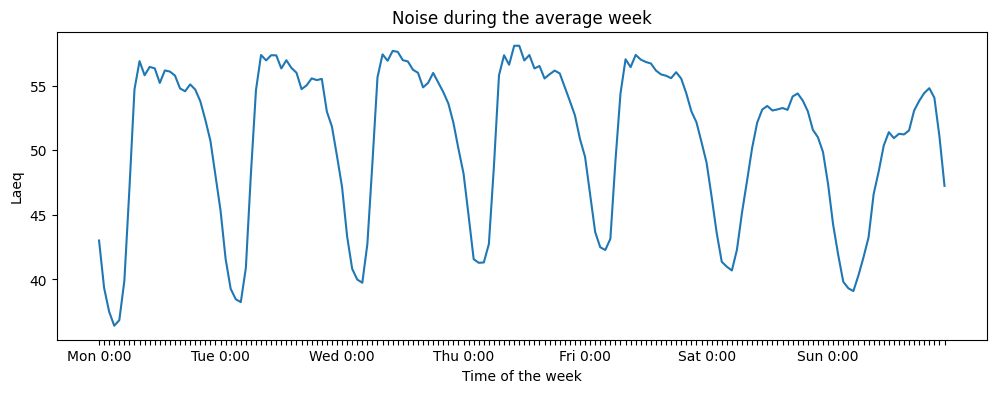

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_noise = df_nd.groupby(["day", "hour"])["laeq"].mean()
average_week_noise.plot(ax=ax)
_ = ax.set(
    title="Noise during the average week",
    xticks=range(168),
    xticklabels=["Mon 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Tue 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Wed 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Thu 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Fri 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Sat 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Sun 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                ],
    xlabel="Time of the week",
    ylabel="Laeq",
)

fig.savefig("Noise_average_week_feb2.png")


In [23]:
#convert noise to relative noise (or relative crowdedness) as target (y), create dataframe with predictors only (X)
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [46]:
#create time-sensitive split for cross-validation
ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=4320,
    max_train_size=10000,
    test_size=1000,
)

In [47]:
#inspect splits
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]
X.iloc[test_0]
X.iloc[train_0]

,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
33200,14,4,19,8,0,62.0,17.53,31.0,320.0,0.0,0.0,-50.0,0.14,340.0,25.38,25.38,25.323,24.515550
33201,14,4,19,8,0,62.0,17.76,32.0,214.0,0.0,0.0,-47.0,0.18,340.0,25.65,25.65,25.593,24.879817
33202,14,4,19,8,0,63.0,18.17,31.0,144.0,0.0,0.0,-56.0,0.09,297.0,25.77,25.77,25.713,24.841102
33203,14,4,19,8,0,63.0,18.23,32.0,227.0,0.0,0.0,-16.0,0.27,217.0,25.70,25.70,25.643,25.030046
33204,14,4,19,8,0,62.0,17.77,32.0,356.0,0.0,0.0,-43.0,0.13,281.0,25.51,25.51,25.453,24.728112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43206,2,4,28,10,0,80.0,13.72,38.0,0.0,0.0,0.0,0.0,0.00,0.0,17.22,17.22,17.163,17.025330
43207,2,4,28,10,0,82.0,13.86,37.0,0.0,0.0,0.0,0.0,0.00,0.0,17.03,17.03,16.973,16.817900
43208,2,4,28,10,0,82.0,13.73,38.0,0.0,0.0,0.0,0.0,0.00,0.0,16.81,16.81,16.753,16.602790
43209,2,4,28,10,0,83.0,13.65,37.0,0.0,0.0,0.0,0.0,0.00,0.0,16.58,16.58,16.523,16.371440


In [48]:
train_4, test_4 = all_splits[4]
X.iloc[test_4]
X.iloc[train_4]

,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
37202,9,4,16,9,0,84.0,10.78,32.0,120.0,0.000,0.000,86.0,0.04,114.0,13.35,13.35,13.293,13.079184
37203,9,4,16,9,0,85.0,11.00,32.0,43.0,0.001,0.001,17.0,0.14,92.0,13.50,13.50,13.443,13.232738
37204,9,4,16,9,0,88.0,11.49,31.0,84.0,0.002,0.001,139.0,0.13,73.0,13.44,13.44,13.383,13.289589
37205,9,4,16,9,0,89.0,11.47,32.0,121.0,0.000,0.001,-26.0,0.06,100.0,13.29,13.29,13.233,13.158517
37206,9,4,16,9,0,88.0,11.22,32.0,172.0,0.000,0.001,-137.0,0.03,114.0,13.16,13.16,13.103,13.078824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47221,23,3,24,11,0,83.0,8.27,37.0,0.0,0.000,0.000,31.0,0.15,0.0,11.11,11.11,11.053,11.154330
47222,23,3,24,11,0,83.0,8.34,38.0,0.0,0.000,0.000,72.0,0.19,0.0,11.18,11.18,11.123,11.202350
47223,23,3,24,11,0,83.0,8.45,37.0,0.0,0.000,0.000,33.0,0.19,0.0,11.25,11.25,11.193,11.275580
47224,23,3,24,11,0,83.0,8.50,38.0,0.0,0.000,0.000,60.0,0.17,0.0,11.28,11.28,11.223,11.326510


In [59]:
#run histogram gradient boosting model
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

gbrt_pipeline = make_pipeline(HistGradientBoostingRegressor(max_leaf_nodes=8,learning_rate=0.15)).set_output(transform="pandas")

evaluate(gbrt_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.039 +/- 0.015
Root Mean Squared Error: 0.048 +/- 0.015


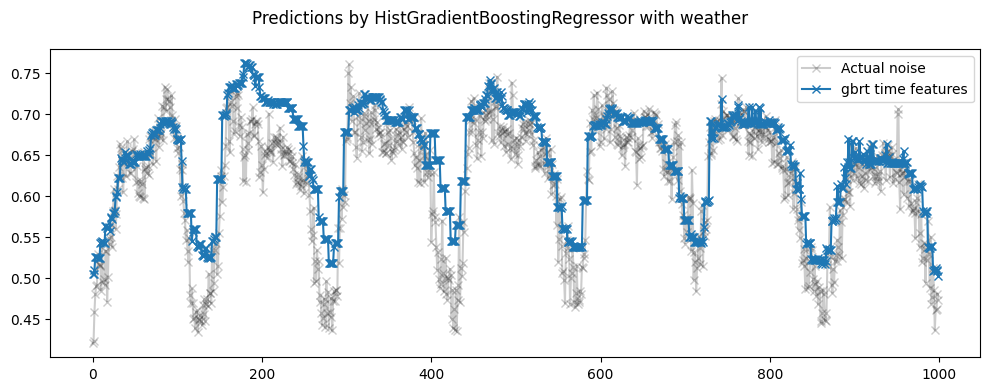

In [50]:
#Qualitative analysis of the impact of features on linear model predictions
gbrt_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_0])

last_hours = slice(-1000, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by HistGradientBoostingRegressor with weather")
ax.plot(
    y.iloc[test_0].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual noise",
    color="black",
)
ax.plot(gbrt_predictions[last_hours], "x-", label="gbrt time features")
_ = ax.legend()


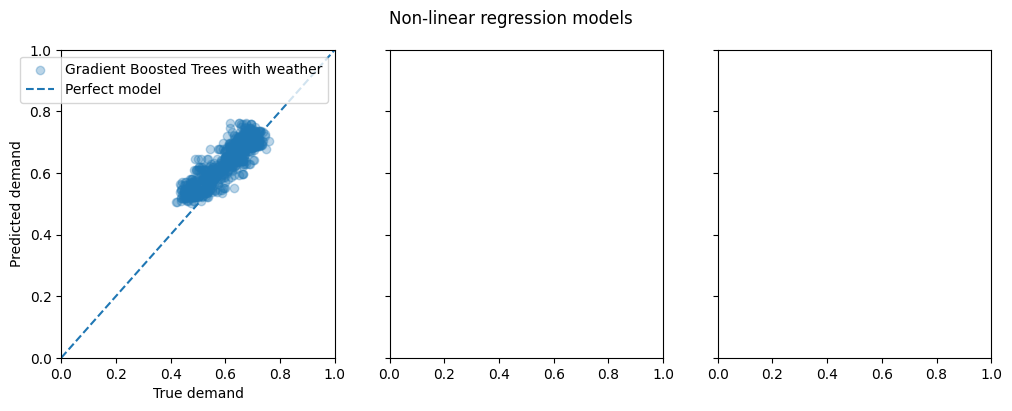

In [51]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    gbrt_predictions,
]
labels = [
    "Gradient Boosted Trees with weather",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_0].values, pred, alpha=0.3, label=label)
    ax.plot([0, 1], [0, 1], "--", label="Perfect model")
    ax.set(
        xlim=(0, 1),
        ylim=(0, 1),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()

plt.show()

In [52]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


In [53]:
df

,result_timestamp,laeq,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,1640995800000000000,48.605833,0,5,1,1,1,91.0,11.88,38.0,0.0,0.0,0.0,-48.0,0.04,0.0,13.28,13.28,13.223,13.23639
1,1640996400000000000,54.277833,0,5,1,1,1,90.0,11.72,37.0,0.0,0.0,0.0,45.0,0.02,0.0,13.28,13.28,13.223,13.16699
2,1640997000000000000,50.025333,0,5,1,1,1,90.0,11.72,38.0,0.0,0.0,0.0,-52.0,0.04,0.0,13.28,13.28,13.223,13.19886
3,1640997600000000000,48.907333,0,5,1,1,1,90.0,11.72,37.0,0.0,0.0,0.0,34.0,0.02,0.0,13.28,13.28,13.223,13.16699
4,1640998200000000000,47.905000,0,5,1,1,1,90.0,11.72,38.0,0.0,0.0,0.0,0.0,0.00,0.0,13.28,13.28,13.223,13.09212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52548,1672528200000000000,52.203333,23,5,31,12,1,52.0,6.79,38.0,0.0,0.0,0.0,-9.0,0.40,0.0,16.61,16.61,16.553,16.52797
52549,1672528800000000000,54.622833,23,5,31,12,1,52.0,6.74,38.0,0.0,0.0,0.0,5.0,0.29,0.0,16.61,16.61,16.553,16.57995
52550,1672529400000000000,56.135667,23,5,31,12,1,52.0,6.62,37.0,0.0,0.0,0.0,-17.0,0.15,0.0,16.51,16.51,16.453,16.44846
52551,1672530000000000000,59.380333,23,5,31,12,1,52.0,6.60,38.0,0.0,0.0,0.0,-31.0,0.29,0.0,16.49,16.49,16.433,16.46641


In [54]:
min_max_scaler=MinMaxScaler()
numerical_columns=['hour','day','day_of_month','month','weekend','LC_HUMIDITY','LC_DWPTEMP','LC_n',
                   'LC_RAD','LC_RAININ','LC_DAILYRAIN','LC_WINDDIR','LC_WINDSPEED','LC_RAD60','LC_TEMP_QCL0',
                   'LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3']
alphas = np.logspace(-6, 6, 25)
naive_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("minmax", min_max_scaler, numerical_columns),
        ],remainder="passthrough",

    ),
    RidgeCV(alphas=alphas),
)
evaluate(naive_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.067 +/- 0.008
Root Mean Squared Error: 0.082 +/- 0.007


In [55]:
from sklearn.preprocessing import SplineTransformer


def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True,
    )
cyclic_spline_transformer = ColumnTransformer(
    transformers=[
        ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
        ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["day"]),
        ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
        ("cyclic_monthday", periodic_spline_transformer(30, n_splines=15), ["day_of_month"])
    ],
    remainder=MinMaxScaler(),
)
cyclic_spline_linear_pipeline = make_pipeline(
    cyclic_spline_transformer,
    RidgeCV(alphas=alphas),
)
evaluate(cyclic_spline_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.044 +/- 0.015
Root Mean Squared Error: 0.053 +/- 0.014


In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import FeatureUnion

hour_weekend_interaction = make_pipeline(
    ColumnTransformer(
        [
            ("cyclic_hour", periodic_spline_transformer(24, n_splines=8), ["hour"]),
            ("weekend", FunctionTransformer(lambda x: x == 1), ["weekend"]),
        ]
    ),
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
)

In [57]:
#adding combining the spline pipeline and the interactions pipeline
cyclic_spline_interactions_pipeline = make_pipeline(
    FeatureUnion(
        [
            ("marginal", cyclic_spline_transformer),
            ("interactions1", hour_weekend_interaction),            
        ]
    ),
    RidgeCV(alphas=alphas),
)
evaluate(cyclic_spline_interactions_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.041 +/- 0.017
Root Mean Squared Error: 0.049 +/- 0.017


In [58]:
from sklearn.kernel_approximation import Nystroem

cyclic_spline_poly_pipeline = make_pipeline(
    cyclic_spline_transformer,
    Nystroem(kernel="poly", degree=2, n_components=70, random_state=0),
    RidgeCV(alphas=alphas),
)
evaluate(cyclic_spline_poly_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.049 +/- 0.018
Root Mean Squared Error: 0.059 +/- 0.018
